In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import seaborn as sns

In [2]:
idvfc = pd.read_csv("idvfc_marzo2022_limpio.csv", encoding='latin1')

In [3]:
#TIDY DATA DE TODOS LOS AÑOS
idvfc_molten =  pd.melt(idvfc, id_vars=['AÃ±o','Clave_Ent','Entidad','Tipo_de_delito','Subtipo_de_delito','Modalidad','Sexo','Rango_de_edad'],
                                               value_vars=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
                                             , var_name = 'Mes')
idvfc_molten

,AÃ±o,Clave_Ent,Entidad,Tipo_de_delito,Subtipo_de_delito,Modalidad,Sexo,Rango_de_edad,Mes,value
0,2015,1,Aguascalientes,Homicidio,Homicidio doloso,Con arma de fuego,Mujer,Menores de edad (0-17),Enero,0.0
1,2015,1,Aguascalientes,Homicidio,Homicidio doloso,Con arma blanca,Mujer,Menores de edad (0-17),Enero,0.0
2,2015,1,Aguascalientes,Homicidio,Homicidio doloso,Con otro elemento,Mujer,Menores de edad (0-17),Enero,0.0
3,2015,1,Aguascalientes,Homicidio,Homicidio doloso,No especificado,Mujer,Menores de edad (0-17),Enero,0.0
4,2015,1,Aguascalientes,Lesiones,Lesiones dolosas,Con arma de fuego,Mujer,Menores de edad (0-17),Enero,0.0
...,...,...,...,...,...,...,...,...,...,...
119803,2022,32,Zacatecas,Feminicidio,Feminicidio,Con arma de fuego,Mujer,No especificado,Diciembre,0.0
119804,2022,32,Zacatecas,Feminicidio,Feminicidio,Con arma blanca,Mujer,No especificado,Diciembre,0.0
119805,2022,32,Zacatecas,Feminicidio,Feminicidio,Con otro elemento,Mujer,No especificado,Diciembre,0.0
119806,2022,32,Zacatecas,Feminicidio,Feminicidio,No especificado,Mujer,No especificado,Diciembre,0.0


In [4]:
from datetime import datetime
import locale 
locale.setlocale(locale.LC_ALL, 'es_ES')

'es_ES'

In [5]:
#CONVERT TO DATATYPE ALL DATAFRAMES
idvfc_molten['Fecha'] = pd.to_datetime(idvfc_molten['AÃ±o'].astype(str)  + idvfc_molten['Mes'], format='%Y%B')

idvfc_molten.set_index('Fecha', inplace=True)

In [7]:
to_drop2 = ['AÃ±o','Tipo_de_delito','Sexo','Mes']

idvfc_molten.drop(to_drop2, inplace =True , axis=1)

In [8]:
idvfc_molten

,Clave_Ent,Entidad,Subtipo_de_delito,Modalidad,Rango_de_edad,value
Fecha,,,,,,
2015-01-01,1,Aguascalientes,Homicidio doloso,Con arma de fuego,Menores de edad (0-17),0.0
2015-01-01,1,Aguascalientes,Homicidio doloso,Con arma blanca,Menores de edad (0-17),0.0
2015-01-01,1,Aguascalientes,Homicidio doloso,Con otro elemento,Menores de edad (0-17),0.0
2015-01-01,1,Aguascalientes,Homicidio doloso,No especificado,Menores de edad (0-17),0.0
2015-01-01,1,Aguascalientes,Lesiones dolosas,Con arma de fuego,Menores de edad (0-17),0.0
...,...,...,...,...,...,...
2022-12-01,32,Zacatecas,Feminicidio,Con arma de fuego,No especificado,0.0
2022-12-01,32,Zacatecas,Feminicidio,Con arma blanca,No especificado,0.0
2022-12-01,32,Zacatecas,Feminicidio,Con otro elemento,No especificado,0.0


In [9]:
subtipo_delito = idvfc_molten.Subtipo_de_delito.unique()


delitos = {}


for delito in subtipo_delito:
    sub_del = idvfc_molten.loc[idvfc_molten['Subtipo_de_delito'] == delito]
    delitos[delito] = sub_del['value']

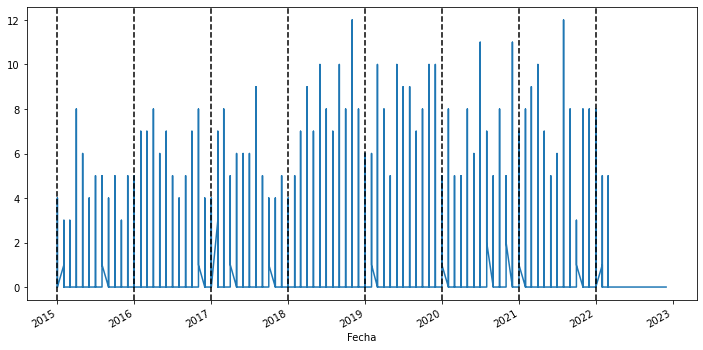

In [11]:
ax = delitos['Feminicidio'].plot(x='Fecha', y='value', figsize=(12,6))
xcoords = ['2015-01-01', '2016-01-01','2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01',
          '2021-01-01','2022-01-01']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')


In [13]:
delitos['Feminicidio']

Fecha
2015-01-01    0.0
2015-01-01    0.0
2015-01-01    0.0
2015-01-01    0.0
2015-01-01    0.0
             ... 
2022-12-01    0.0
2022-12-01    0.0
2022-12-01    0.0
2022-12-01    0.0
2022-12-01    0.0
Name: value, Length: 36864, dtype: float64

In [14]:
delitos['Feminicidio'].to_csv("ts_feminicidio.csv")

In [15]:
ts_feminicido = pd.read_csv("ts_feminicidio.csv")

In [17]:
ts_feminicido.head()

,Fecha,value
0,2015-01-01,0.0
1,2015-01-01,0.0
2,2015-01-01,0.0
3,2015-01-01,0.0
4,2015-01-01,0.0


In [19]:
ts_feminicido.index = pd.to_datetime(ts_feminicido['Fecha'], format='%Y-%m-%d')

In [22]:
del ts_feminicido['Fecha']

In [24]:
sns.set()

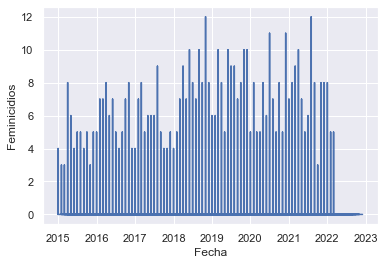

In [28]:
plt.ylabel('Feminicidios')
plt.xlabel('Fecha')
#plt.xticks(rotation=45)

plt.plot(ts_feminicido.index,ts_feminicido['value'],)

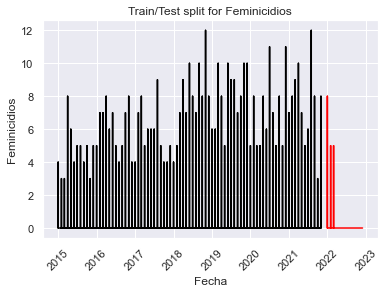

In [35]:
train =ts_feminicido[ts_feminicido.index < pd.to_datetime("2021-12-01", format='%Y-%m-%d')]
test = ts_feminicido[ts_feminicido.index > pd.to_datetime("2021-12-01", format='%Y-%m-%d')]

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Feminicidios')
plt.xlabel('Fecha')
plt.xticks(rotation=45)
plt.title("Train/Test split for Feminicidios")
plt.show()

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [36]:
y = train['value']

In [37]:
y

Fecha
2015-01-01    0.0
2015-01-01    0.0
2015-01-01    0.0
2015-01-01    0.0
2015-01-01    0.0
             ... 
2020-12-01    0.0
2020-12-01    0.0
2020-12-01    0.0
2020-12-01    0.0
2020-12-01    0.0
Name: value, Length: 31872, dtype: float64

In [38]:
ARMAmodel = SARIMAX(y, order = (1, 0, 1))

/Users/esthephanyayala/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/esthephanyayala/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/Users/esthephanyayala/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/esthephanyayala/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585

In [39]:
ARMAmodel = ARMAmodel.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.97046D-01    |proj g|=  1.27526D-02


 This problem is unconstrained.



At iterate    5    f=  9.96674D-01    |proj g|=  1.43936D-02

At iterate   10    f=  9.90058D-01    |proj g|=  2.06308D-02

At iterate   15    f=  9.89401D-01    |proj g|=  1.55034D-02

At iterate   20    f=  9.86769D-01    |proj g|=  4.22379D-02

At iterate   25    f=  9.85070D-01    |proj g|=  3.43735D-04

At iterate   30    f=  9.84753D-01    |proj g|=  3.22859D-04

At iterate   35    f=  9.84736D-01    |proj g|=  3.74426D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     35     42      1     0     0   3.744D-06   9.847D-01
  F =  0.98473557033677050     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

In [40]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

/Users/esthephanyayala/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/esthephanyayala/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


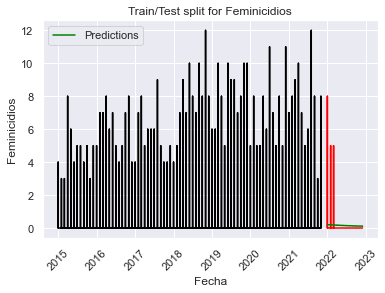

In [43]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.ylabel('Feminicidios')
plt.xlabel('Fecha')
plt.xticks(rotation=45)
plt.title("Train/Test split for Feminicidios")
#plt.show()

plt.legend()

In [45]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["value"].values, 
                                       y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  0.3437863076236046


In [46]:
from statsmodels.tsa.arima.model import ARIMA

/Users/esthephanyayala/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/esthephanyayala/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/Users/esthephanyayala/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/esthephanyayala/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585

/Users/esthephanyayala/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/esthephanyayala/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/Users/esthephanyayala/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/esthephanyayala/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585

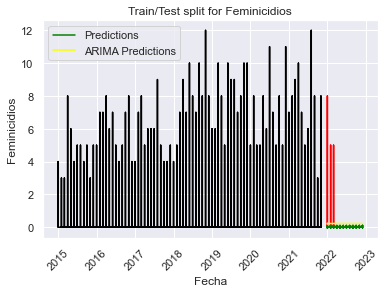

In [57]:
ARIMAmodel = ARIMA(y, order = (2, 1, 2))
ARIMAmodel = ARIMAmodel.fit()
y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 




y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out_arima = y_pred_df["Predictions"] 

plt.plot(train, color = "black")
plt.plot(test, color = "red")

plt.plot(y_pred_out, color='green', label = 'Predictions')

plt.plot(y_pred_out_arima, color='Yellow', label = 'ARIMA Predictions')
plt.ylabel('Feminicidios')
plt.xlabel('Fecha')
plt.xticks(rotation=45)
plt.title("Train/Test split for Feminicidios")
#plt.show()


plt.legend()
